Section 1 - iris_db: Using iris data from our MySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [81]:
import acquire
import prepare
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env
import os

from pydataset import data

# import splitting functions
from sklearn.model_selection import train_test_split

from scipy.stats import mannwhitneyu

In [19]:
#acquire the data
iris = acquire.get_iris_data()
iris

this file exists, reading from csv


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [22]:
iris.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
iris.shape

(150, 7)

In [24]:
# prepare the data
iris = prepare.prep_iris(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
train, validate, test = prepare.splitting_data(iris, 'species')

In [27]:
train.shape

(90, 5)

In [28]:
validate.shape

(30, 5)

In [29]:
test.shape

(30, 5)

In [30]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [91]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [32]:
#intializing empty lists
cat_col = []
con_col = []

#looping through all my columns
for col in iris.columns:
    
    #finding all my string columns
    print(col)
    print(iris[col].dtype)
    if iris[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check for how many unique values
        print(iris[col].nunique())
        if iris[col].nunique() < 10:
            print('treat as categorical variable')
            cat_col.append(col)
        else: 
            #if it has more than 10 unique values, append to continous column variable
            con_col.append(col)
    print()

sepal_length
float64
this is a number
35

sepal_width
float64
this is a number
23

petal_length
float64
this is a number
43

petal_width
float64
this is a number
22

species
object
this is a string variable



In [33]:
cat_col

['species']

In [34]:
con_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [47]:
print(iris.sepal_length.describe())
print()
print(iris.sepal_width.describe())
print()
print(iris.petal_length.describe())
print()
print(iris.petal_width.describe())
print()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64



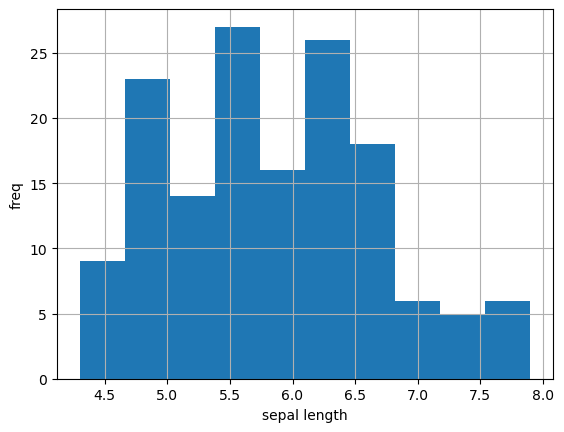

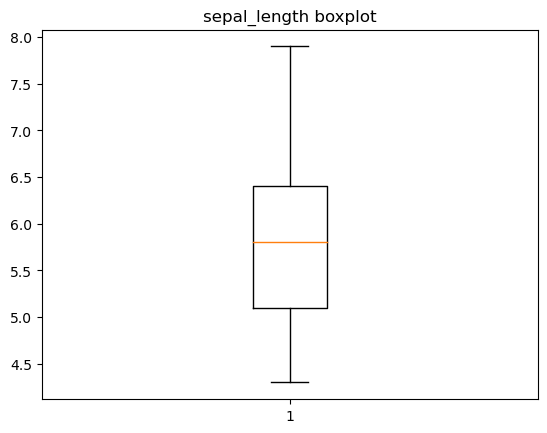

In [101]:
# plot the data
iris['sepal_length'].hist()
plt.xlabel('sepal length')
plt.ylabel('freq')
plt.show()
plt.boxplot(iris['sepal_length'])
plt.title('sepal length boxplot')
plt.show()

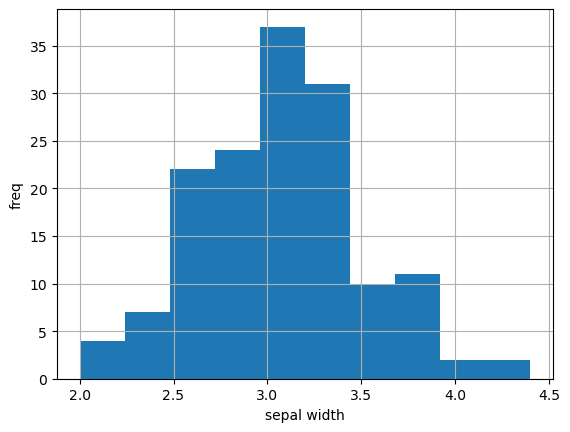

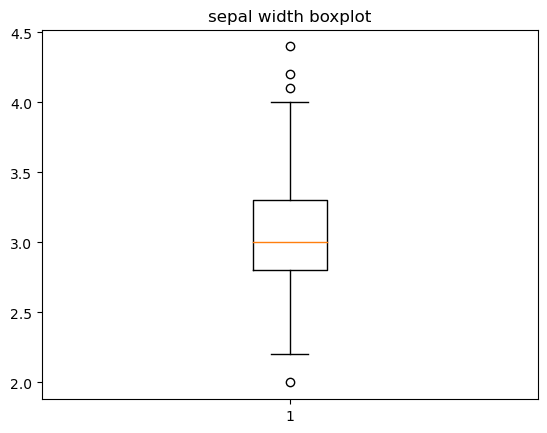

In [102]:
# plot the data
iris['sepal_width'].hist()
plt.xlabel('sepal width')
plt.ylabel('freq')
plt.show()
plt.boxplot(iris['sepal_width'])
plt.title('sepal width boxplot')
plt.show()

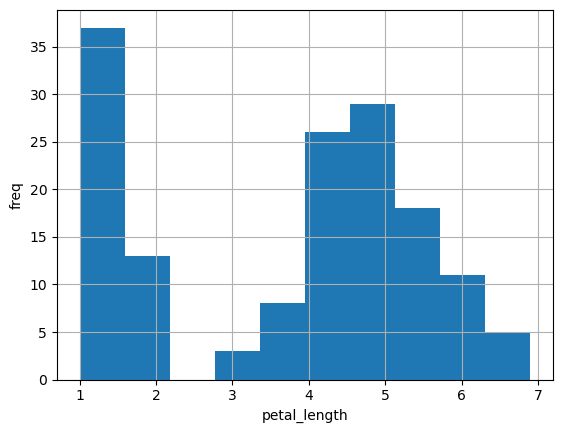

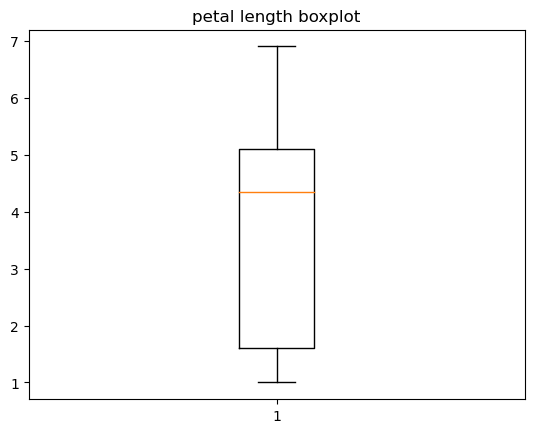

In [103]:
# plot the data
iris['petal_length'].hist()
plt.xlabel('petal_length')
plt.ylabel('freq')
plt.show()
plt.boxplot(iris['petal_length'])
plt.title('petal length boxplot')
plt.show()

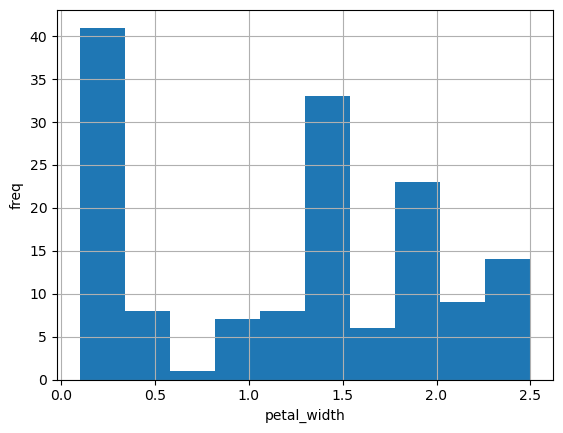

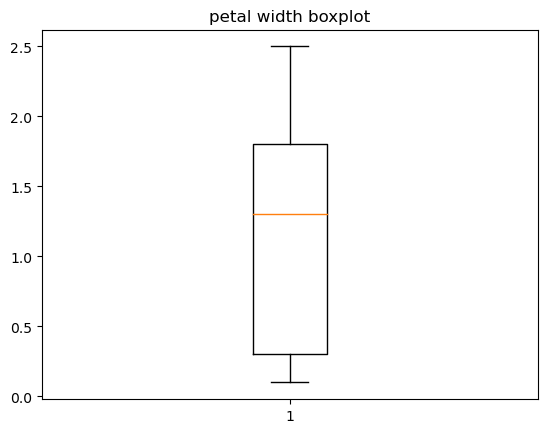

In [104]:
# plot the data
iris['petal_width'].hist()
plt.xlabel('petal_width')
plt.ylabel('freq')
plt.show()
plt.boxplot(iris['petal_width'])
plt.title('petal width boxplot')
plt.show()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [51]:
# Creating the frequency table
freq = pd.crosstab(iris['species'], columns='Num of Species')

# Reset the index to make 'species' a regular column
freq.reset_index(inplace=True)

In [53]:
freq

col_0,species,Num of Species
0,setosa,50
1,versicolor,50
2,virginica,50


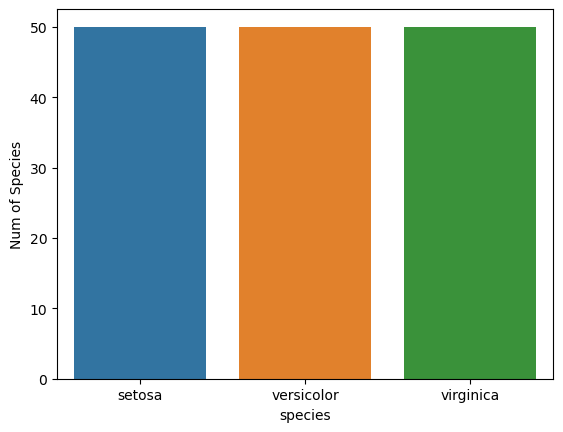

In [56]:
sns.barplot(data=freq, y='Num of Species', x='species');

Document takeaways & any actions.

In [57]:
# number of species occurs the same amount through all species. Virginica species has the highest sepal length.

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

sepal_length
count    90.000000
mean      5.781111
std       0.792081
min       4.300000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64


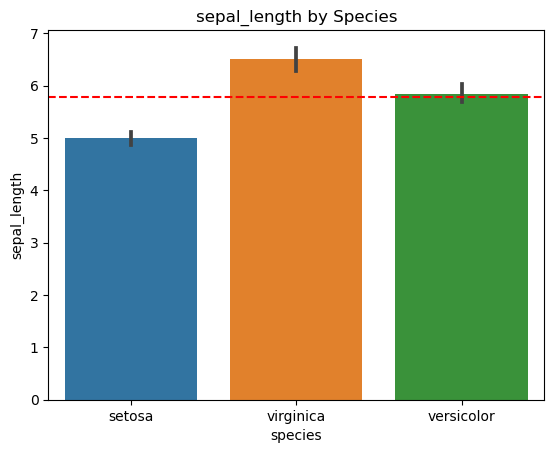

sepal_width
count    90.000000
mean      3.023333
std       0.434741
min       2.000000
25%       2.725000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64


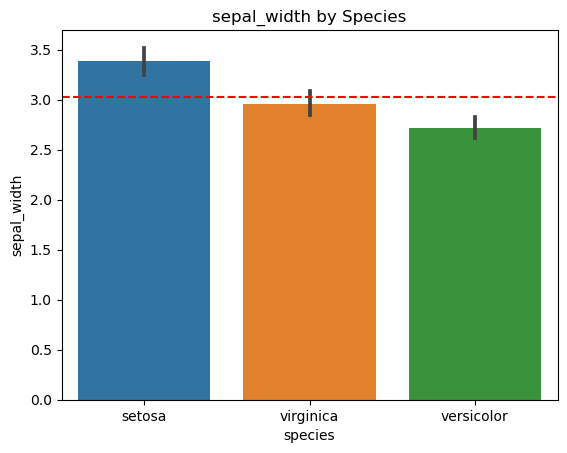

petal_length
count    90.000000
mean      3.728889
std       1.710526
min       1.100000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


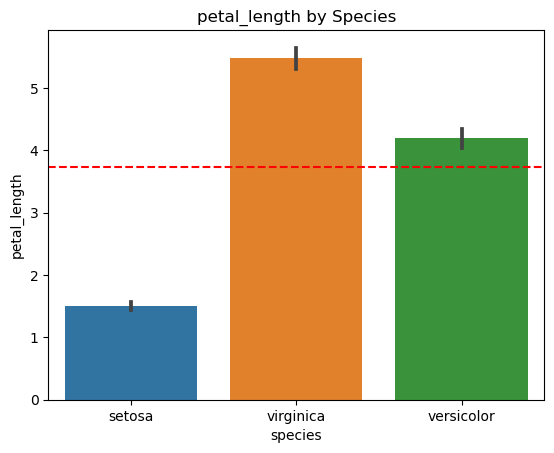

petal_width
count    90.000000
mean      1.191111
std       0.757679
min       0.100000
25%       0.325000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


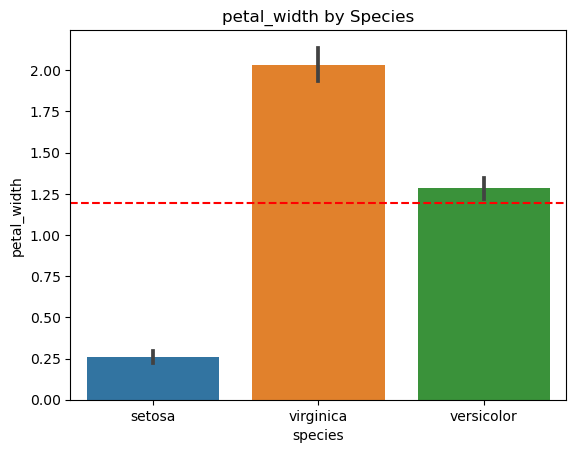

In [78]:
for col in con_col:
    print(col)
    print(train[col].describe())
    sns.barplot(data=train, y=train[col], x=train['species'])  # Using 'col' as the y-axis
    overall_mean = train[col].mean()  # Calculate the mean for the current column
    plt.axhline(y=overall_mean, color='red', linestyle='--')  # Plot mean as a horizontal line
    plt.title(f'{col} by Species')
    plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [67]:
train.groupby('species')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,4.993333,0.354219,4.3,4.800,5.0,5.175,5.7
versicolor,30.0,5.843333,0.478996,5.0,5.525,5.7,6.075,7.0
virginica,30.0,6.506667,0.616404,4.9,6.225,6.4,6.875,7.9


In [68]:
train.groupby('species')['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,3.39,0.384484,2.3,3.200,3.40,3.65,4.4
versicolor,30.0,2.72,0.303315,2.0,2.525,2.75,2.90,3.4
virginica,30.0,2.96,0.319050,2.5,2.800,2.95,3.10,3.8


In [69]:
train.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,1.510000,0.178789,1.1,1.4,1.5,1.600,1.9
versicolor,30.0,4.196667,0.444494,3.0,4.0,4.2,4.500,5.1
virginica,30.0,5.480000,0.508141,4.5,5.1,5.5,5.675,6.9


In [70]:
train.groupby('species')['petal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,0.256667,0.100630,0.1,0.2,0.20,0.300,0.5
versicolor,30.0,1.283333,0.170361,1.0,1.2,1.30,1.375,1.6
virginica,30.0,2.033333,0.277095,1.4,1.8,2.05,2.300,2.5


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [83]:
# Filter the data for virginica and versicolor
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

# Perform Mann-Whitney U test for petal_width
statistic, p_value = mannwhitneyu(virginica['petal_width'], versicolor['petal_width'])

# Display the results
print(f"Mann-Whitney U test for petal_width:\n"
      f"Statistic: {statistic}\n"
      f"P-value: {p_value}\n"
      f"{'Significant' if p_value < 0.05 else 'Not significant'} difference between groups")

Mann-Whitney U test for petal_width:
Statistic: 889.0
P-value: 7.12423012584302e-11
Significant difference between groups


Document takeaways & any actions.

In [ ]:
# the petal lengths have significant differences.

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


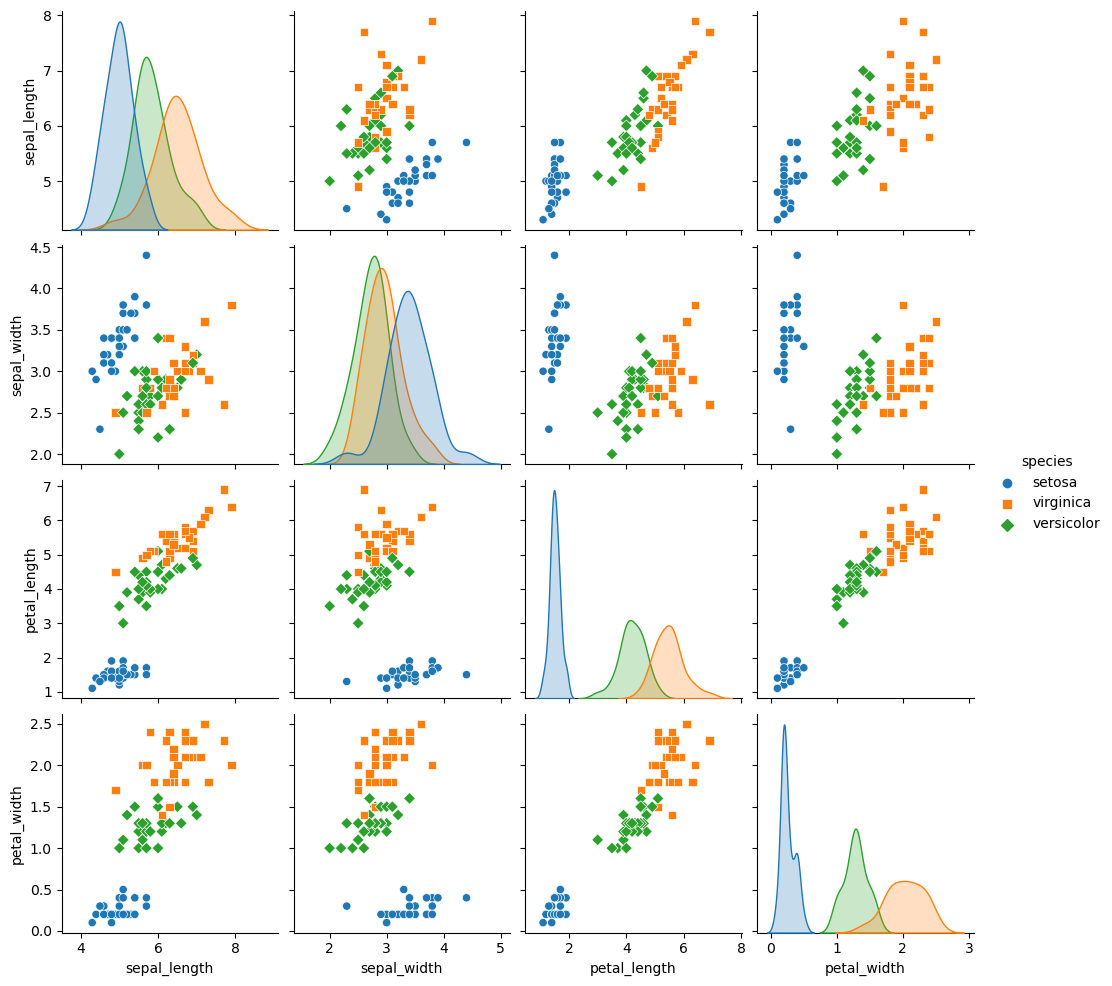

In [87]:
# Create a pairplot with color representing species
sns.pairplot(train, hue='species', markers=["o", "s", "D"])

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Petal Length vs. Petal Width by Species')

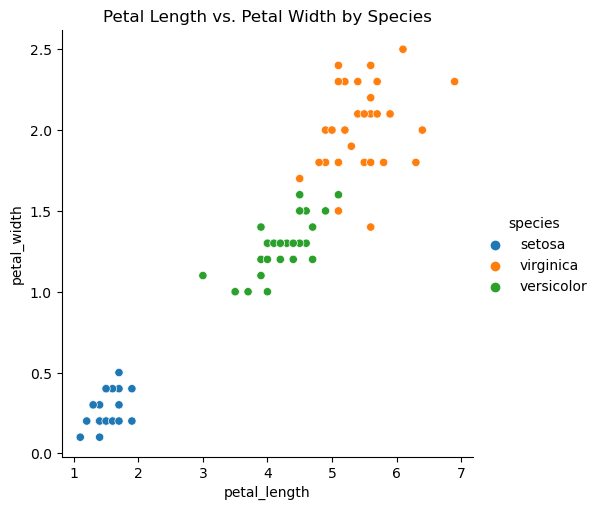

In [89]:
# Create a scatter plot with different colors for each species
sns.relplot(x='petal_length', y='petal_width', hue='species', data=train)
plt.title('Petal Length vs. Petal Width by Species')

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

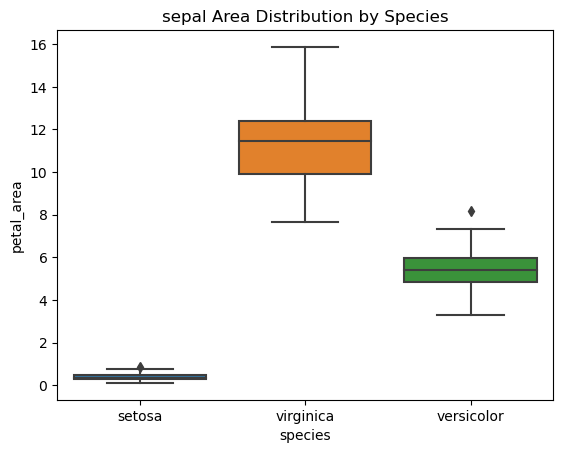

Mann-Whitney U Statistic: 900.0
P-value: 2.913694207049005e-11
The difference in petal area between Virginica and Setosa is statistically significant.


In [90]:
# Calculate petal area
train['petal_area'] = train['petal_length'] * train['petal_width']

# Filter data for Virginica and Setosa
virginica = train[train['species'] == 'virginica']['petal_area']
setosa = train[train['species'] == 'setosa']['petal_area']

# Visualize distributions using a boxplot
sns.boxplot(x='species', y='petal_area', data=train)
plt.title('sepal Area Distribution by Species')
plt.show()

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(virginica, setosa, alternative='two-sided')

# Display the results
print(f'Mann-Whitney U Statistic: {statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print('The difference in petal area between Virginica and Setosa is statistically significant.')
else:
    print('There is no significant difference in petal area between Virginica and Setosa.')